### This Notebook is used for testing a simple linear regression model & its utility functions 

## 1.Importing libraries and the dataset

In [72]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path
from matplotlib import pyplot as plt
import plotly.graph_objects as go


# 获取当前工作目录，假设 main.ipynb 位于项目根目录
current_dir = Path().resolve()
# 构建 src 目录的路径
src_dir = current_dir / 'src'
# 将 src 目录添加到 sys.path
if str(src_dir) not in sys.path:
    sys.path.append(str(src_dir))

from util import *
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Load Data

In [73]:
# load data
file_path = 'data/multiple_featuresGD.txt'
data = np.genfromtxt(file_path, delimiter=',', skip_header=1)

# 分离特征和目标变量
x_train = data[:, :-1]  # 选择除最后一列之外的所有列
y_train = data[:, -1]   # 选择最后一列

# x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
# y_train = np.array([460, 232, 178])





## 3. Visiualize Data

In [77]:
def showGraph(x_train, y_train):
    # 提取用于绘图的数据
    rooms = x_train[:, 1]  # 房间数
    area = x_train[:, 0]   # 房屋面积
    price = y_train        # 价格

    # 创建绘图
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # 房间数 vs 价格
    ax[0].scatter(rooms, price, color='blue')
    ax[0].set_title('Rooms vs Price')
    ax[0].set_xlabel('Number of Rooms')
    ax[0].set_ylabel('Price ($)')

    # 房屋面积 vs 价格
    ax[1].scatter(area, price, color='red')
    ax[1].set_title('Area vs Price')
    ax[1].set_xlabel('House Area (sqft)')
    ax[1].set_ylabel('Price ($)')

    # 显示图形
    plt.tight_layout()
    plt.show()


Shape of the dataset: (47, 3)
x_train:
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]
 [1.940e+03 4.000e+00]
 [2.000e+03 3.000e+00]
 [1.890e+03 3.000e+00]
 [4.478e+03 5.000e+00]
 [1.268e+03 3.000e+00]
 [2.300e+03 4.000e+00]
 [1.320e+03 2.000e+00]
 [1.236e+03 3.000e+00]
 [2.609e+03 4.000e+00]
 [3.031e+03 4.000e+00]
 [1.767e+03 3.000e+00]
 [1.888e+03 2.000e+00]
 [1.604e+03 3.000e+00]
 [1.962e+03 4.000e+00]
 [3.890e+03 3.000e+00]
 [1.100e+03 3.000e+00]
 [1.458e+03 3.000e+00]
 [2.526e+03 3.000e+00]
 [2.200e+03 3.000e+00]
 [2.637e+03 3.000e+00]
 [1.839e+03 2.000e+00]
 [1.000e+03 1.000e+00]
 [2.040e+03 4.000e+00]
 [3.137e+03 3.000e+00]
 [1.811e+03 4.000e+00]
 [1.437e+03 3.000e+00]
 [1.239e+03 3.000e+00]
 [2.132e+03 4.000e+00]
 [4.215e+03 4.000e+00]
 [2.162e+03 4.000e+00]
 [1.664e+03 2.000e+00]
 [2.238e+03 3.000

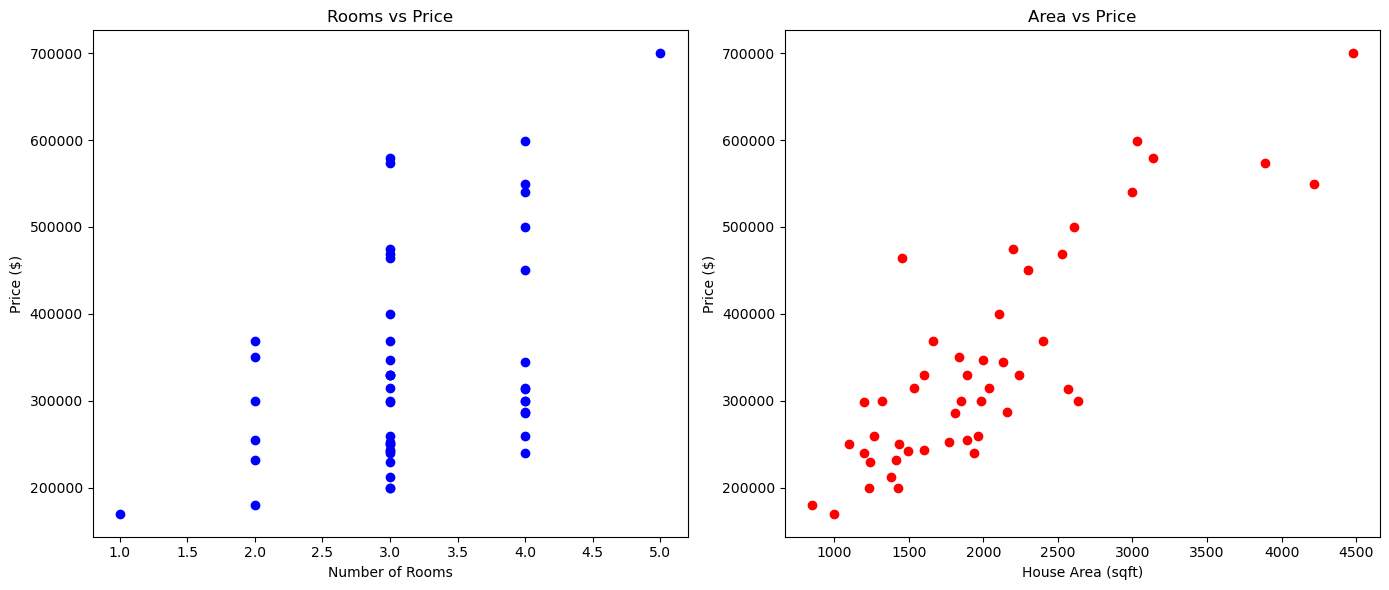

In [78]:
print("Shape of the dataset:", data.shape)
print("x_train:\n", x_train)
print("y_train:\n", y_train)

showGraph(x_train, y_train)

# 创建图形
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,  # 将点的大小设置得更小
        color=z,                # 设置颜色尺度
        colorscale='Viridis',   # 选择颜色的颜色范围
        opacity=0.8
    )
)])
# 设置图形布局
fig.update_layout(
    title='House Price Relation to Area and Number of Rooms',
    scene=dict(
        xaxis_title='House Area',
        yaxis_title='Number of Rooms',
        zaxis_title='Price'
    ),
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100)
)
fig.show()


## 4. Preprocessing Data

In [75]:
x_train = feature_scaling(x_train)
y_train = feature_scaling(y_train)

# show data after feature scaling
showGraph(x_train, y_train)

AttributeError: module 'data_processing' has no attribute 'feature_normalize'

In [67]:
# set parameters
featurs=x_train.shape[1] # extract the number of features
# make sure the shape of w is same as the number of features
initial_w = np.zeros(featurs) 
initial_b = 0           # b shoule be a number, not a vector
learning_rate = 5e-8
num_iterations = 1000
print(initial_w)
print(initial_b)


[0. 0.]
0


In [68]:
# do simple linear regression
w_final, b_final = multi_feature_linear_regression(x_train, y_train,
                                                 initial_w, initial_b, learning_rate, num_iterations)

Iteration    1: W [67.59267516  0.09928587],B0.030218909804452937, Cost 24492309477.15
Iteration    2: W [90.18635388  0.13274845],B0.040477956990986254, Cost 15462213795.94
Iteration    3: W [107.55993347   0.15867147],B0.04847686134174831, Cost 10122756870.10
Iteration    4: W [120.9194784   0.1787969],B0.054737811783671965, Cost 6965558840.65
Iteration    5: W [131.19240106   0.19446423],B0.05966234943644325, Cost 5098721154.36
Iteration    6: W [139.09184221   0.20670345],B0.0635592423770602, Cost 3994868014.92
Iteration    7: W [145.16617683   0.21630662],B0.06666592015059061, Cost 3342164371.69
Iteration    8: W [149.83708199   0.22388278],B0.0691649559991234, Cost 2956223494.20
Iteration    9: W [153.42880947   0.22990024],B0.07119674099621826, Cost 2728018298.07
Iteration   11: W [158.31446763   0.23861638],B0.07426543540622065, Cost 2513293997.28
Iteration   12: W [159.94755821   0.24180492],B0.07544919065706653, Cost 2466115960.27
Iteration   13: W [161.20333523   0.2444485 ]